In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
train_labels[0]

3

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
model.compile('rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 3.2604 - accuracy: 0.4234 - val_loss: 1.8140 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.5419 - accuracy: 0.6878 - val_loss: 1.3408 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0606 - accuracy: 0.7712 - val_loss: 1.1375 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8251 - accuracy: 0.8260 - val_loss: 1.0390 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6687 - accuracy: 0.8584 - val_loss: 0.9629 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5499 - accuracy: 0.8876 - val_loss: 0.9301 - val_accuracy: 0.8220
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4313 - accuracy: 0.9117 - val_loss: 0.9129 - val_accuracy: 0.8080
Epoch 8/20
16

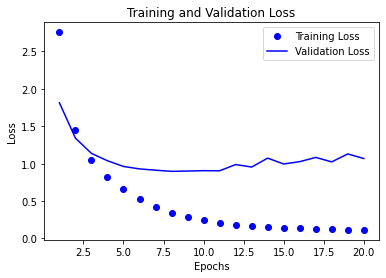

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

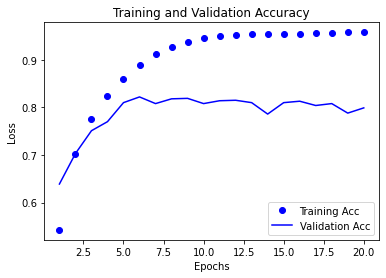

In [11]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile('rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 3.3030 - accuracy: 0.3609 - val_loss: 1.8871 - val_accuracy: 0.6300
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.6305 - accuracy: 0.6799 - val_loss: 1.3594 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1709 - accuracy: 0.7595 - val_loss: 1.1616 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8877 - accuracy: 0.8165 - val_loss: 1.0573 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.7011 - accuracy: 0.8565 - val_loss: 0.9745 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5432 - accuracy: 0.8885 - val_loss: 0.9335 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.4246 - accuracy: 0.9175 - val_loss: 0.9011 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [13]:
predictions = model.predict(x_test)

predictions[0].shape

(46,)

In [14]:
np.sum(predictions[0])

1.0

In [15]:
np.argmax(predictions[0])

3